In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
train_csv = pd.read_csv("train.csv")
test_csv = pd.read_csv('test.csv')

In [16]:
df = pd.concat([train_csv , test_csv])

In [17]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


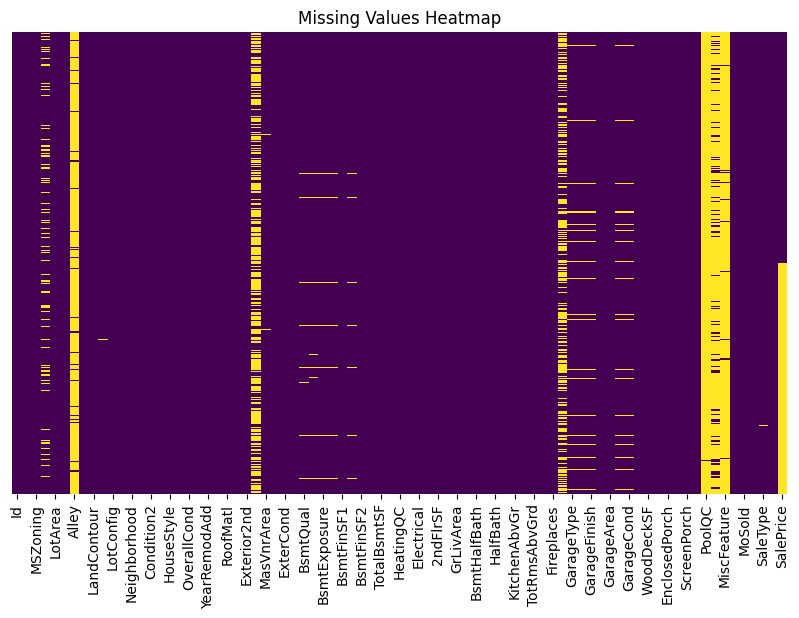

In [18]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor



numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns




imputer_num = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42), random_state=42)
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])




for col in categorical_cols:

    df[col] = df[col].fillna(df[col].mode()[0])




print("\nMissing values after imputation:\n", df.isnull().sum())



Missing values after imputation:
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [20]:
df.drop(columns = ["Id"] , inplace = True)
df.drop_duplicates(inplace = True)

In [21]:
cat_cols = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
    'SaleType', 'SaleCondition' ,'OverallQual',	'OverallCond'
]


In [22]:
num_cols = [
    'MSSubClass', 'LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
    'GarageCars','WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold', 'SalePrice'
]


In [23]:
df[num_cols].corr()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.423313,-0.201730,0.034409,0.043315,0.003718,-0.064196,-0.072484,-0.125955,-0.219737,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.078830
LotFrontage,-0.423313,1.000000,0.450411,0.101251,0.063433,0.213634,0.213558,0.068678,0.109955,0.356689,...,0.133977,0.154984,0.025369,0.050199,0.067697,0.171375,0.035141,0.013207,-0.009949,0.365767
LotArea,-0.201730,0.450411,1.000000,0.024128,0.021612,0.127696,0.194081,0.084076,0.021375,0.254222,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.269295
YearBuilt,0.034409,0.101251,0.024128,1.000000,0.612235,0.313027,0.279642,-0.027557,0.130479,0.408616,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.561539
YearRemodAdd,0.043315,0.063433,0.021612,0.612235,1.000000,0.196816,0.152250,-0.062057,0.165142,0.298297,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.528863
MasVnrArea,0.003718,0.213634,0.127696,0.313027,0.196816,1.000000,0.306057,-0.016289,0.089474,0.399343,...,0.165755,0.148163,-0.107566,0.013389,0.064500,0.004386,0.044530,0.001285,-0.021435,0.512228
BsmtFinSF1,-0.064196,0.213558,0.194081,0.279642,0.152250,0.306057,1.000000,-0.055030,-0.477385,0.536495,...,0.223555,0.124234,-0.099665,0.050920,0.096854,0.084468,0.093304,-0.000844,0.022536,0.431426
BsmtFinSF2,-0.072484,0.068678,0.084076,-0.027557,-0.062057,-0.016289,-0.055030,1.000000,-0.238237,0.089429,...,0.098419,-0.005846,0.032754,-0.023274,0.063313,0.044527,-0.005135,-0.009558,0.008876,0.001248
BsmtUnfSF,-0.125955,0.109955,0.021375,0.130479,0.165142,0.089474,-0.477385,-0.238237,1.000000,0.412274,...,-0.039279,0.119772,0.005015,-0.005808,-0.049150,-0.032271,-0.010490,0.022626,-0.038019,0.197680
TotalBsmtSF,-0.219737,0.356689,0.254222,0.408616,0.298297,0.399343,0.536495,0.089429,0.412274,1.000000,...,0.229720,0.245632,-0.085426,0.037911,0.075418,0.072224,0.084015,0.018057,-0.011217,0.643575


<Axes: >

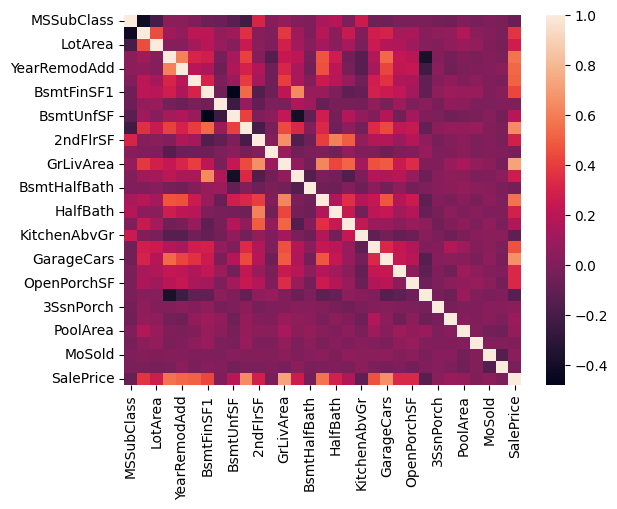

In [24]:
sns.heatmap(df[num_cols].corr())

In [25]:
corr_matrix = df[num_cols].corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.79)]
to_drop.remove('SalePrice')
df.drop(columns = to_drop , inplace = True)


ValueError: list.remove(x): x not in list

In [ ]:
df[num_cols].describe()

In [ ]:
for i in num_cols:
    plt.figure(figsize=(10,6))
    sns.distplot(df[i])
    plt.tight_layout()

In [ ]:
for i in cat_cols:
    print(df[i].value_counts())
    print("-"*60)

In [ ]:
for col in cat_cols:
    plt.figure(figsize = (10,6))
    sns.countplot(x = col , data = df)
    plt.xticks(rotation = 60)

In [ ]:
for col in cat_cols:
    plt.figure(figsize = (10,6))
    plt.pie(df[col].value_counts() ,autopct = "%.1f%%", labels = df[col].value_counts().index)
    plt.title(col)


In [ ]:
# Bivariate analysis


In [ ]:
sns.pairplot(df[num_cols + ['SaleCondition']],
             hue='SaleCondition',
             diag_kind='kde',
             plot_kws={'alpha': 0.5})

In [ ]:
imp_col = [
 'Neighborhood',
 'BsmtQual',
 'ExterQual',
 'KitchenQual',
 'GarageFinish',
 'GarageType',
 'Foundation',
 'FireplaceQu',
 'CentralAir',
 'BsmtFinType1',
 'Exterior1st',
 'HeatingQC',
 'Exterior2nd',
 'MSZoning',
 'MasVnrType',
 'HouseStyle',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'PavedDrive',
 'SaleCondition'
]


In [ ]:
for i in imp_col:
  for j in imp_col:
    if i != j:
      print(pd.crosstab(df[i] , df[j]))
      print('-'*50)

In [ ]:
# Apply Yeo-Johnson transform
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()

transformed = pt1.fit_transform(df[num_cols])



trans = pd.DataFrame(transformed , columns = num_cols)

pd.DataFrame({'cols':trans.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

In [ ]:
for col in trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(trans[col])
    plt.title(col)

    plt.show()